In [124]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import roc_auc_score
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import threading
%matplotlib inline

train_df = pd.read_csv('train_small.csv', header=None)
test_df = pd.read_csv('test_small.csv')

In [38]:
# Don't touch this !!!
Importance = []

In [7]:
train_df.iloc[:,2:202]

,2,3,4,5,6,7,8,9,10,11,...,192,193,194,195,196,197,198,199,200,201
0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
1,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
2,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
3,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
4,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70052,15.3063,2.8260,11.4074,4.7992,11.4529,5.3734,4.5088,15.3278,-1.8373,9.1206,...,2.0609,7.8403,4.7942,-3.9589,12.6339,0.6451,3.5126,9.7643,16.9017,6.8054
70053,8.0438,-1.9184,13.1498,9.2027,8.9886,2.7531,4.2194,18.1138,-0.6744,6.4648,...,7.1818,10.8590,3.5770,1.2627,16.9983,-1.5922,-3.5687,8.1765,19.5095,-13.3091
70054,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,4.8121,8.6043,...,3.9357,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149
70055,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388


In [118]:
n_train = 1000
X = train_df.iloc[:n_train,2:202]
Y = train_df.iloc[:n_train,1]

predicted = train_df.iloc[n_train:,2:202]
test_targets = train_df.iloc[n_train:,1]

seed = 7
num_trees = 500
rate=1
#model.set_params(learning_rate=0.1)
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed, learning_rate=rate)

start = time.time()
model.fit(X,Y)
end = time.time()
print(end-start)

12.426086902618408


In [119]:
Bag.append(model, 2)

200 rows, 100 estimators, seed 7 : time 0.5137200355529785s, AUC: 59.9471% 


1000 rows, 100 estimators, seed 7 : time 3.8169243335723877s, AUC: 67.2782%

1000 rows, 500 estimators, seed 7 : time 12.413071393966675s, AUC: 71.9681% (long predicition time too)

1000 rows, 500 estimators, seed 59 : time 15.736421823501587s, AUC: 70.3920% rate=0.1 (long predicition time too)

seed 3 12.04 AUC: 69.7397%

seed 5698 13.112201452255249 AUC: 68.6723%

#### Bag of 1000 500 : AUC: 71.8003% 

1000 rows, 1000 estimators, seed 7 : time 13.438799858093262s, AUC: 71.9681% (long predicition time too)

1500 rows, 100 estimators, seed 7 : time 4.20394492149353s, AUC: 68.8388% 

5000 rows, 100 estimators, seed 7 : time ~2s, AUC: 55.4254%

5000 rows, 1000 estimators, seed 85 : time 2.05419659614563s, AUC: 50.9328% 

5000 rows, 1000 estimators, seed 7 : time 13.552645206451416s, AUC: 67.8960%, learning_rate 0.1


10000 rows, 100 estimators, seed 7 : time 2.211735248565674s, AUC: 59.3489%

10000 rows, 100 estimators, seed 8 : time 3.394503355026245s, AUC: 56.6519% 

10000 rows, 100 estimators, seed 8571598 : time 2.2348690032958984s, AUC: 54.9773%

10000 rows, 100 estimators, seed 7 : time 3.394503355026245s, AUC: 56.6519% 

10000 rows, 1000 estimators, seed 7 : time 2.2529687881469727s, AUC: 59.3489% 

10000 rows, 1000 estimators, seed 7 : time 7.415714502334595s, AUC: 57.7267%

In [70]:
preds = model.predict(predicted)

roc = roc_auc_score(test_targets, preds)
print("AUC: %.4f%% " % (roc * 100))

#results = model_selection.cross_val_score(model, X, Y, cv=kfold)
#print(results.mean())

AUC: 68.6723% 


In [71]:
Importance.append(model.feature_importances_)

In [59]:
Importance0 = Importance
Importance = [Importance[0]]

[0.26315789 0.4009324  0.22737307 ... 0.19285714 0.33886584 0.2006079 ]


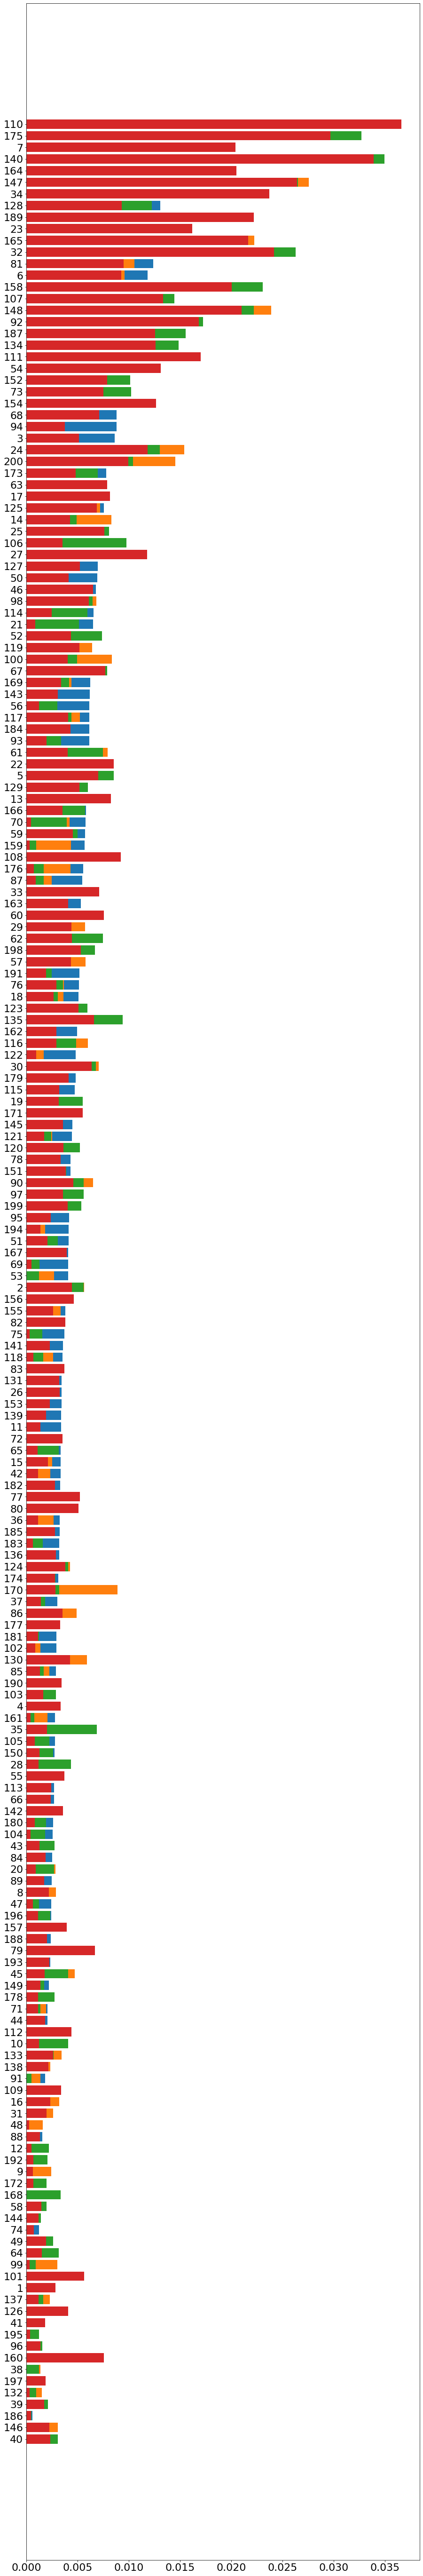

In [72]:
print(preds)
fig, ax = plt.subplots()
rcParams.update({'font.size': 22})
rcParams['figure.figsize'] = 15,100

labels = [x for _,x in sorted(zip(Importance[0],np.arange(1, 201)))]

for imp in Importance:
    #ax.barh([i for i in range(200)], sorted(Importance[-1]),  align='center')
    ax.barh([i for i in range(200)], [imp[i-1] for i in labels],  align='center')
ax.set_yticks([i for i in range(200)])
ax.set_yticklabels(labels)
plt.show()

In [ ]:
#Different seeds gives similar results

In [78]:
a = np.array([1,2,5,8])
a.shape = (4,1)
#a.shape = len(a)
print(a)

[[1]
 [2]
 [5]
 [8]]


In [143]:
class Bag_pred:
    def __init__(self, predictors=[], weights=None):
        self.predictors = predictors
        if weights==None:
            self.weights = list(np.ones(len(predictors)))
        else:
            self.weights = list(weights)
            
    
        
    
    def predict(self, Y):
        
        def Lambda(predictor,Y,predicts,i):
            predicts[i] = predictor.predict(Y)
        
        threads = []
        predictions = 5*[0]
        for i, pred in enumerate(self.predictors):
            threads.append(threading.Thread(target=Lambda, args=(pred,Y,predictions,i)))
            threads[i].start()
        for i, _ in enumerate(self.predictors):
            threads[i].join()
        
        weights = np.array(self.weights)/sum(self.weights)
        total = weights[0]*np.array(self.predictors[0].predict(Y))
        total.shape = len(total)
        for pred, weight in zip(predictions, weights[1:]):
            prediction = weight*np.array(pred)
            prediction.shape = len(prediction)
            total += prediction
        return total
    
    def fit(self, X, y):
        for pred in self.predictors:
            pred.fit(X,y)
            
    def append(self, pred, weight=1):
        self.predictors.append(pred)
        self.weights.append(weight)
            

In [140]:
predss = Bag.predictors
Bag = Bag_pred(predss)

In [141]:
start = time.time()
pred = Bag.predict(predicted)
end = time.time()
print(end-start)

59.44000506401062


In [142]:
roc = roc_auc_score(test_targets, pred)
print("AUC: %.4f%% " % (roc * 100))

AUC: 70.3835% 


In [135]:
len(Bag.predictors)

5